<!-- ### 3 types of envs: 
#### 1. 11*11_empty 
![11*11_level1.png](/home/siyao/project/rlPractice/MiniGrid/level/11*11_level1.png)
#### 2. 6*12_empty
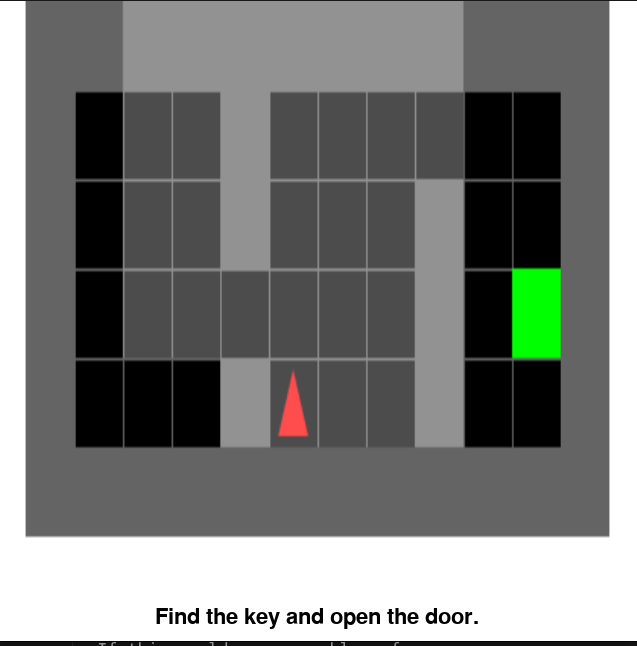
#### 3. 21*21_empty
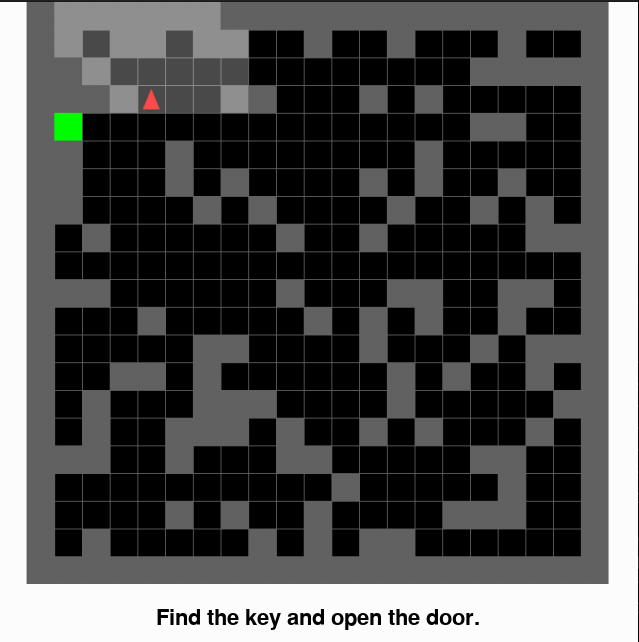
<img src="image_url" alt="21*21_empty.png" width="300" height="200">
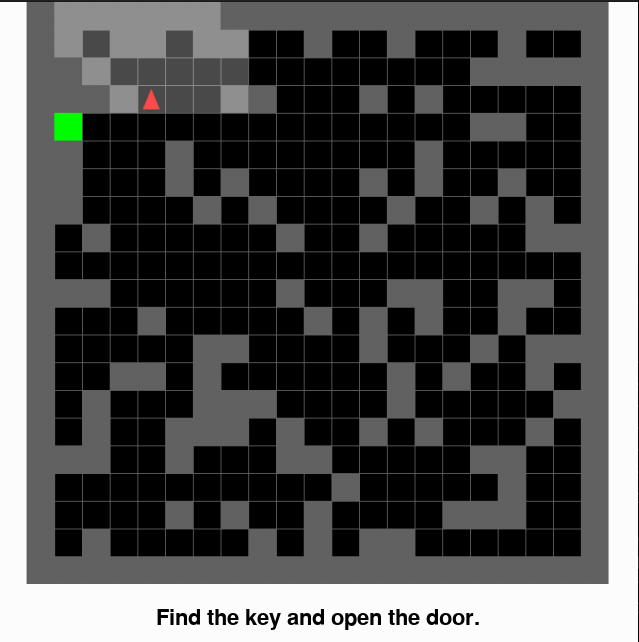


 -->


In [25]:
import pandas as pd

# Read the CSV file into a DataFrame
df1 = pd.read_csv("/home/siyao/project/rlPractice/MiniGrid/modelBased/visulization/PPO/PPO_csv/env_11_11.csv")
# Display the first few rows
df2 = pd.read_csv("/home/siyao/project/rlPractice/MiniGrid/modelBased/visulization/PPO/PPO_csv/env_6_12.csv")
# Display the first few rows
df3 = pd.read_csv("/home/siyao/project/rlPractice/MiniGrid/modelBased/visulization/PPO/PPO_csv/env_8_6.csv")
df4 = pd.read_csv("/home/siyao/project/rlPractice/MiniGrid/modelBased/visulization/PPO/PPO_csv/env_21_21_random.csv")
df4['loss_smooth'] = df4['Reward'].ewm(span=40).mean()  # span 控制平滑程度
# Display the first few rows
# Display the first few rows
print(df1.head())

   Episode   Reward
0        1  0.99460
1        2  0.99235
2        3  0.99235
3        4  0.98425
4        5  0.99415


## comparison experiment for 3 structure world model (mask size = 3)
### 1. Attention-Based World model comparison

In [30]:

import plotly.graph_objects as go

fig = go.Figure()

# Use step indices for the x-axis
steps = list(range(len(df1)))  # Generate step indices
steps2 = list(range(len(df2)))  # Generate step indices
steps3 = list(range(len(df3)))  # Generate step indices
steps4 = list(range(len(df4)))  # Generate step indices
# 1. 11*11
# Add the Original Loss Curve (background)
fig.add_trace(go.Scatter(
    x=steps,
    y=df1["Reward"],
    mode='lines',
    name='11*11_env_empty',
    line=dict(color='#2C91E0', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=True
))


# 2. 6*12
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2["Reward"],
    mode='lines',
    name='6*12_env_empty',
    line=dict(color='#3ABF99', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=True
))


# 3. 21*21
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3["Reward"],
    mode='lines',
    name='8*6_env_empty',
    line=dict(color='#F0A73A', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=True
))

# 4. 21*21
# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps3,
    y=df4['loss_smooth'],
    mode='lines',
    name='21*21_env_empty',
    line=dict(color='#F0A73A', width=1)  # Highlighted, thicker line
))

# Update the layout with a centered title
fig.update_layout(
    title=dict(
        text="Policy validation",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title="Step",
    yaxis_title="Loss",
    xaxis=dict(range=[0, 1000]),  # 限制 X 轴范围
    yaxis=dict(range=[0.3, 1]),  # 限制 Y 轴范围
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150)
)
fig.show()


